# Milestone project 2:

## Bulldozer Sales Prediction: Kaggle: Blue Book Bulldozer.

### Predicting the Sales price of bulldozer using ML.

* In this Notebook, we are going to go through an example ML project with the goal of predicting the sales priec.

#### 1. Problem Definition
> How well we can predict the future sales of bulldozer, geven it's characteristics and past data of how much similiar bulldozer have been sold.

#### 2. Data:
> Data is downloaded from Kaggle Blue Book of Bulldozer compedition.

https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are three main datasets:

* Train.csv - is the training set, which contains data through the **end of 2011.**

* Valid.csv - is the validation set, which contains data **from January 1, 2012 - April 30, 2012** You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv - is the test set, which won't be released until the last week of the competition. It contains data **from May 1, 2012 - November 2012**. Your score on the test set determines your final rank for the competition.

#### 3. Evaluation.
> The evaluation metric for this competition is the **RMSLE (root mean squared log error)** between the actual and predicted auction prices.

* **NOTE:** The goal for most regression evoluation metrics is to minimize the error. For example, our goal for this project to build a ML model which minimizes the **RMSLE**.

#### 4. Features.

> Kaggle provides a data dictionary which provides detailing of all features of dataset.

#### 5. Modeling.

#### 6. Expiriment.

In [1]:
#Import basic libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [16]:
#Import data(TrainAndValid.csv) into dataframe: 
#df_train = pd.read_csv('/Users/arunmac/workspace/DS/all-projects/Zero-Mastery/007 - Milestone_Project2/input/Train.csv')

df = pd.read_csv("/Users/arunmac/workspace/DS/all-projects/Zero-Mastery/007 - Milestone_Project2/input/TrainAndValid.csv"
                ,low_memory=False
                ,parse_dates=['saledate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [10]:
df.sample(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
178287,1610231,37500.0,792167,4701,132,2.0,1998,NaN,NaN,8/7/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
87191,1391337,12000.0,1139193,7008,132,1.0,1977,NaN,NaN,10/12/2004 0:00,...,32 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
144986,1513660,66000.0,1465830,3371,132,1.0,1984,NaN,NaN,6/26/1991 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110727,1445237,35000.0,1358182,3362,132,1.0,1975,NaN,NaN,12/7/2001 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307061,2258725,75000.0,1326235,3362,136,1.0,1000,0.0,NaN,12/10/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101109,1419671,18000.0,775671,7261,132,1.0,1980,NaN,NaN,5/26/2005 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
203560,1643191,26500.0,1392606,4605,132,4.0,2004,NaN,NaN,2/7/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331167,2339854,67500.0,1713825,14390,136,1.0,2004,5466.0,Medium,3/10/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
264166,1800233,12000.0,1222810,5514,132,2.0,2003,NaN,NaN,2/7/2007 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320655,2303878,92500.0,622456,1269,136,1.0,2005,0.0,NaN,3/25/2009 0:00,...,None or Unspecified,"11' 0""",None or Unspecified,Yes,Triple,NaN,NaN,NaN,NaN,NaN


## EDA:

In [15]:
#Check is there any missing values:

df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [17]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

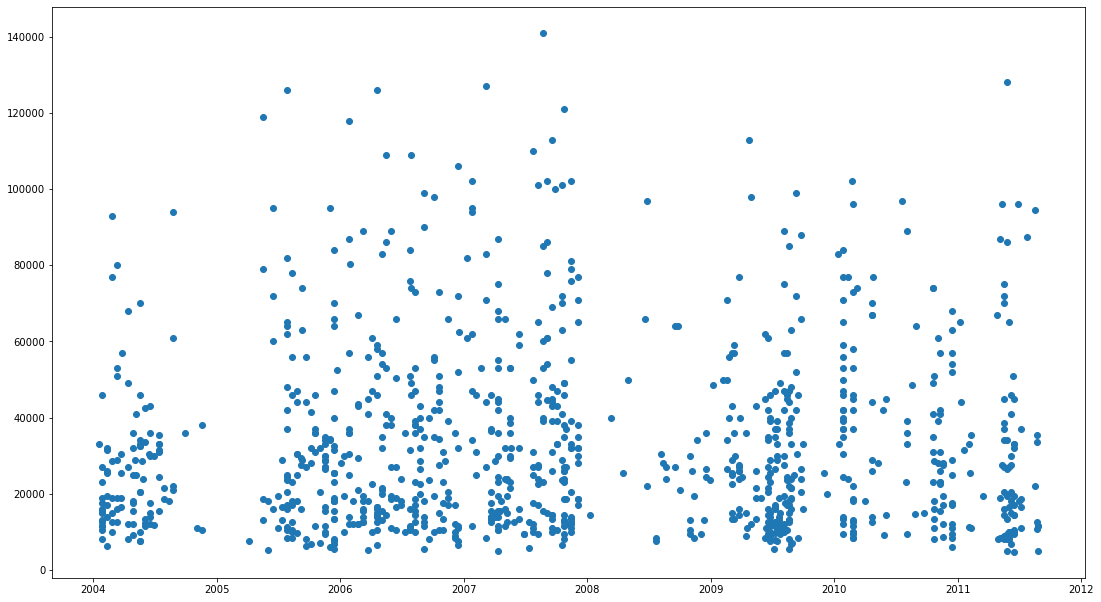

In [26]:
#Visualize the import features:

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])


In [28]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883
datasource,121,121,121,121,121,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00,2004-08-26 00:00:00,2005-11-17 00:00:00,2009-08-27 00:00:00,2007-08-09 00:00:00


In [29]:
# Rearrange the saledate column to 2 column:

temp = df.pop('saledate')

df.insert(1, 'saledate', temp)

df.head(10).T

,0,1,2,3,4,5,6,7,8,9
SalesID,1139246,1139248,1139249,1139251,1139253,1139255,1139256,1139261,1139272,1139275
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00,2008-12-18 00:00:00,2004-08-26 00:00:00,2005-11-17 00:00:00,2009-08-27 00:00:00,2007-08-09 00:00:00
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0,26500.0,21000.0,27000.0,21500.0,65000.0
MachineID,999089,117657,434808,1026470,1057373,1001274,772701,902002,1036251,1016474
ModelID,3157,77,7009,332,17311,4605,1937,3539,36003,3883
datasource,121,121,121,121,121,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007,2004,1993,2001,2008,1000
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0,508.0,11540.0,4883.0,302.0,20700.0
UsageBand,Low,Low,High,High,Medium,Low,High,High,Low,Medium


In [34]:
# Sort the SaleDate:

df.sort_values(by=['saledate'], inplace=True)

df.saledate

205615   1989-01-17
128751   1989-01-31
67974    1989-01-31
274835   1989-01-31
141296   1989-01-31
            ...    
409202   2012-04-28
411890   2012-04-28
408976   2012-04-28
409297   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [35]:
#make a copy of orginal DF:
df_tmp = df.copy()
df.head().T

,205615,128751,67974,274835,141296
SalesID,1646770,1477524,1344379,1821514,1505138
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00
SalePrice,9500.0,10000.0,70000.0,14000.0,50000.0
MachineID,1126363,1078853,1374638,1194089,1473654
ModelID,8434,4103,3819,10150,4139
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1972,1982,1980,1978
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
